# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [4]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [5]:
# 設定 data_path
dir_data = 'C:/Users/E2118/Documents/codevegechicken/ML_marathon/13/'

In [6]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/E2118/Documents/codevegechicken/ML_marathon/13/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [21]:
#1
#　指定多个区间
cut_rule = [0,1,2,3,5]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=False,right=True)
for i in ['0','>5']:
    app_train['CNT_CHILDREN_GROUP'].cat.add_categories(i,inplace = True)
cates=app_train['CNT_CHILDREN_GROUP'].value_counts()

In [22]:
for i,num in enumerate(app_train['CNT_CHILDREN']):
    if num==0:
        app_train.loc[i,'CNT_CHILDREN_GROUP']='0'
    elif num>5:
        app_train.loc[i,'CNT_CHILDREN_GROUP']='>5'

In [8]:
app_train['CNT_CHILDREN_GROUP'].value_counts()

0         215371
(0, 1]     61119
(1, 2]     26749
(2, 3]      3717
(3, 5]       513
>5            42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [9]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [24]:
#2-1
grp = 'CNT_CHILDREN_GROUP'
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(0, 1]    175664.465567
(1, 2]    172580.748737
(2, 3]    173948.262712
(3, 5]    171293.508772
0         166288.713566
>5        147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
grouped_df.describe()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN_GROUP,,,,,,,,
"(0, 1]",61119.0,175664.465567,483369.696710,27000.0,112500.0,157500.0,202500.0,117000000.0
"(1, 2]",26749.0,172580.748737,148604.309586,26550.0,112500.0,157500.0,202500.0,18000090.0
"(2, 3]",3717.0,173948.262712,114143.899409,31500.0,112500.0,148500.0,202500.0,2250000.0
"(3, 5]",513.0,171293.508772,103784.567249,29250.0,112500.0,144000.0,202500.0,810000.0
0,215371.0,166288.713566,104700.345823,25650.0,112500.0,144000.0,202500.0,13500000.0
>5,42.0,147910.714286,72786.394413,45000.0,103500.0,126000.0,193500.0,337500.0


In [37]:
app_train['CNT_CHILDREN_GROUP'][6]

Interval(0, 1, closed='right')

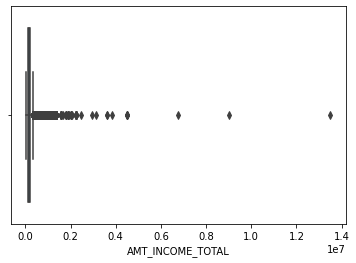

In [35]:
import seaborn as sns
x0=app_train[app_train['CNT_CHILDREN_GROUP']=='0']['AMT_INCOME_TOTAL']
ax = sns.boxplot(x0)
#0個小孩

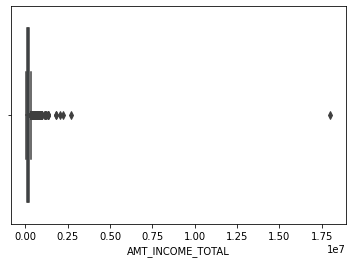

In [40]:
#1~2個小孩
x2=app_train[app_train['CNT_CHILDREN_GROUP']==pd.Interval(1, 2, closed='right')]['AMT_INCOME_TOTAL']
ax = sns.boxplot(x2)

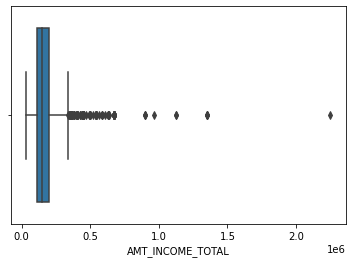

In [41]:
#2~3個小孩
x3=app_train[app_train['CNT_CHILDREN_GROUP']==pd.Interval(2, 3, closed='right')]['AMT_INCOME_TOTAL']
ax = sns.boxplot(x3)

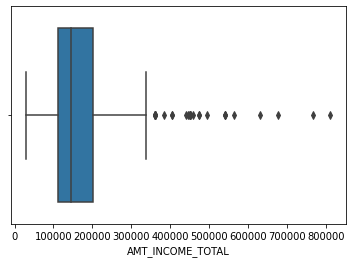

In [42]:
#3~5個小孩
x4=app_train[app_train['CNT_CHILDREN_GROUP']==pd.Interval(3, 5, closed='right')]['AMT_INCOME_TOTAL']
ax = sns.boxplot(x4)

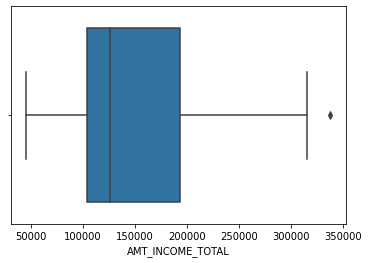

In [43]:
#5個小孩以上
x5=app_train[app_train['CNT_CHILDREN_GROUP']=='>5']['AMT_INCOME_TOTAL']
ax = sns.boxplot(x5)

In [48]:
#2-2
grouped_df.mean()
grouped_df.std()

CNT_CHILDREN_GROUP
(0, 1]    483369.696710
(1, 2]    148604.309586
(2, 3]    114143.899409
(3, 5]    103784.567249
0         104700.345823
>5         72786.394413
Name: AMT_INCOME_TOTAL, dtype: float64

In [50]:
Mean=grouped_df.transform('mean')    
Std=grouped_df.transform('std')

In [53]:
#3
from scipy.stats import zscore
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.transform(lambda x:zscore(x,ddof=1))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345856
1,270000.0,0.990553
2,67500.0,-0.943538
3,135000.0,-0.298841
4,121500.0,-0.427780
